In [1]:
import numpy as np
from sklearn.neighbors.kde import KernelDensity
from scipy.signal import argrelextrema
from bisect import bisect_left
from matplotlib import pyplot as plt

Read data from file

In [2]:
data = np.load('inga_out.npz')

In [3]:
mass = data['arr_0']
mass

array([ 552.293448,  338.046024,  724.221464, ...,  328.072907,
        262.19328 ,  636.278192])

In [4]:
name = data['arr_1']
name

array(['UNPD98266', 'UNPD207163', 'UNPD3499', ..., 'UNPD98267',
       'UNPD47332', 'UNPD101003'], dtype=object)

In [5]:
massabund = data['arr_2']
massabund

array([[  41.00329 ,    1.688456],
       [  43.01894 ,    2.135631],
       [  55.01894 ,    1.105409],
       ..., 
       [ 549.23414 ,   24.377134],
       [ 551.24979 ,   22.666363],
       [ 591.2447  ,    5.496205]])

In [6]:
blockind = data['arr_3']
blockind

array([     0,      0,      0, ..., 220988, 220988, 220988], dtype=uint32)

In [7]:
values = massabund[:,0].reshape(-1,1)
values.shape

(5324089, 1)

In [8]:
x = np.arange(0, 3200, 0.1).reshape(-1,1)
x.shape

(32000, 1)

### Density

In [64]:
splits_kde1 = np.load('Discretization3_kde/splits_kde_0.12.npy')
splits_kde1.shape

(2400,)

In [65]:
splits_kde2 = np.load('Discretization3_kde/splits_kde_0.1.npy')
splits_kde2.shape

(2554,)

In [66]:
splits_kde3 = np.load('Discretization3_kde/splits_kde_0.08.npy')
splits_kde3.shape

(2794,)

### Splitting

In [17]:
splits_splitting1 = np.load('Discretization2_splitting/splits_splitting_0.2.npy')
splits_splitting1.shape

(2236,)

In [24]:
splits_splitting2 = np.load('Discretization2_splitting/splits_splitting_0.1.npy')
splits_splitting2.shape

(4050,)

In [25]:
splits_splitting3 = np.load('Discretization2_splitting/splits_splitting_0.05.npy')
splits_splitting3.shape

(6858,)

### Plotting

In [82]:
def plot(values, dens, splitter1=None, splitter2=None, splitter3=None):

    if splitter1 is None:
        return
    plt.figure(figsize=(20,5))
    plt.xlim([100,150])
    plt.plot(x, np.exp(dens), '-')
    plt.plot(values, -(ymax*0.02)-(ymax*0.02)*np.random.random(values.shape[0]), '+k')
    for split in splitter1:
        plt.axvline(x=split, color='r')
    plt.show()
    
    if splitter2 is None:
        return
    plt.figure(figsize=(20,5))
    plt.xlim([100,150])
    plt.plot(x, np.exp(dens), '-')
    plt.plot(values, -(ymax*0.02)-(ymax*0.02)*np.random.random(values.shape[0]), '+k')
    for split in splitter2:
        plt.axvline(x=split, color='g')
    plt.show()
        
    if splitter3 is None:
        return
    plt.figure(figsize=(20,5))
    plt.xlim([100,150])
    plt.plot(x, np.exp(dens), '-')
    plt.plot(values, -(ymax*0.02)-(ymax*0.02)*np.random.random(values.shape[0]), '+k')
    for split in splitter3:
        plt.axvline(x=split, color='b')
    plt.show()

In [83]:
dens1 = np.load('Discretization3_kde/dens0.1.npy')
dens1.shape

(32000,)

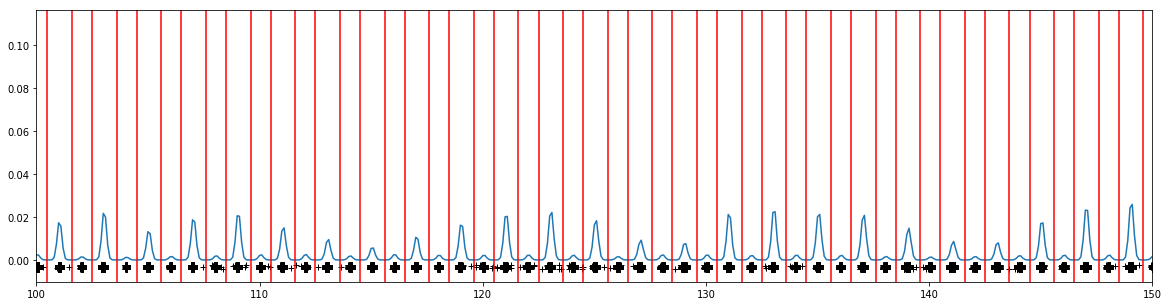

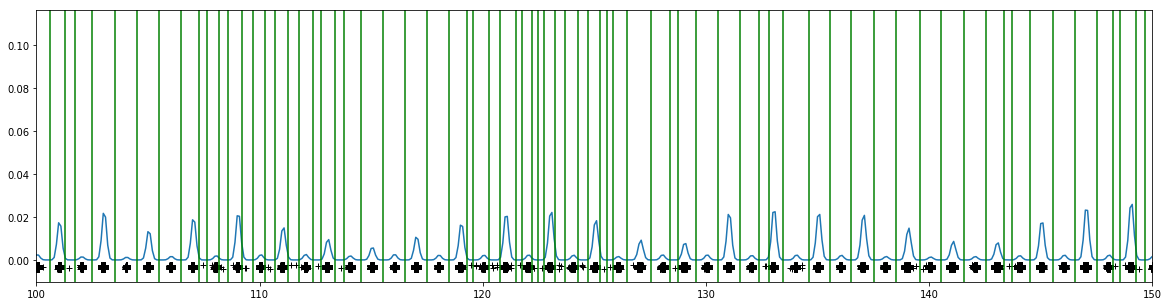

In [84]:
plot(values, dens1, splits_kde1, splits_splitting1)